In [2]:
pip install praw


In [94]:
import praw
import re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
reddit = praw.Reddit(client_id='####', 
                     client_secret='#####', 
                     user_agent='####',
                     username="####")
print(reddit.user.me())

None


In [96]:
# get new posts form wsb
submissions = reddit.subreddit('wallstreetbets').new(limit=None)

In [97]:
#List of mentioned tickers
complete=[]
for submission in submissions:
    words = submission.title.split()
    stock = filter(lambda x: x.startswith('$'),words)
    updated_stock = [re.sub(r'[^a-zA-Z]','',str(x)) for x in stock if not re.search(r'\d',x)]
    if len(updated_stock) >0:
        complete.append(updated_stock)


In [98]:
#Flatten list
flat_complete = [x.upper() for sublist in complete for x in sublist]
Freq = sorted(Counter(flat_complete).items(), key=lambda x: x[1], reverse=True)

In [99]:
#Prepare for graph
x_values=[]
y_values=[]
for x in Freq:
    x_values.append(x[0])
    y_values.append(x[1])

C:\Users\kvnzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


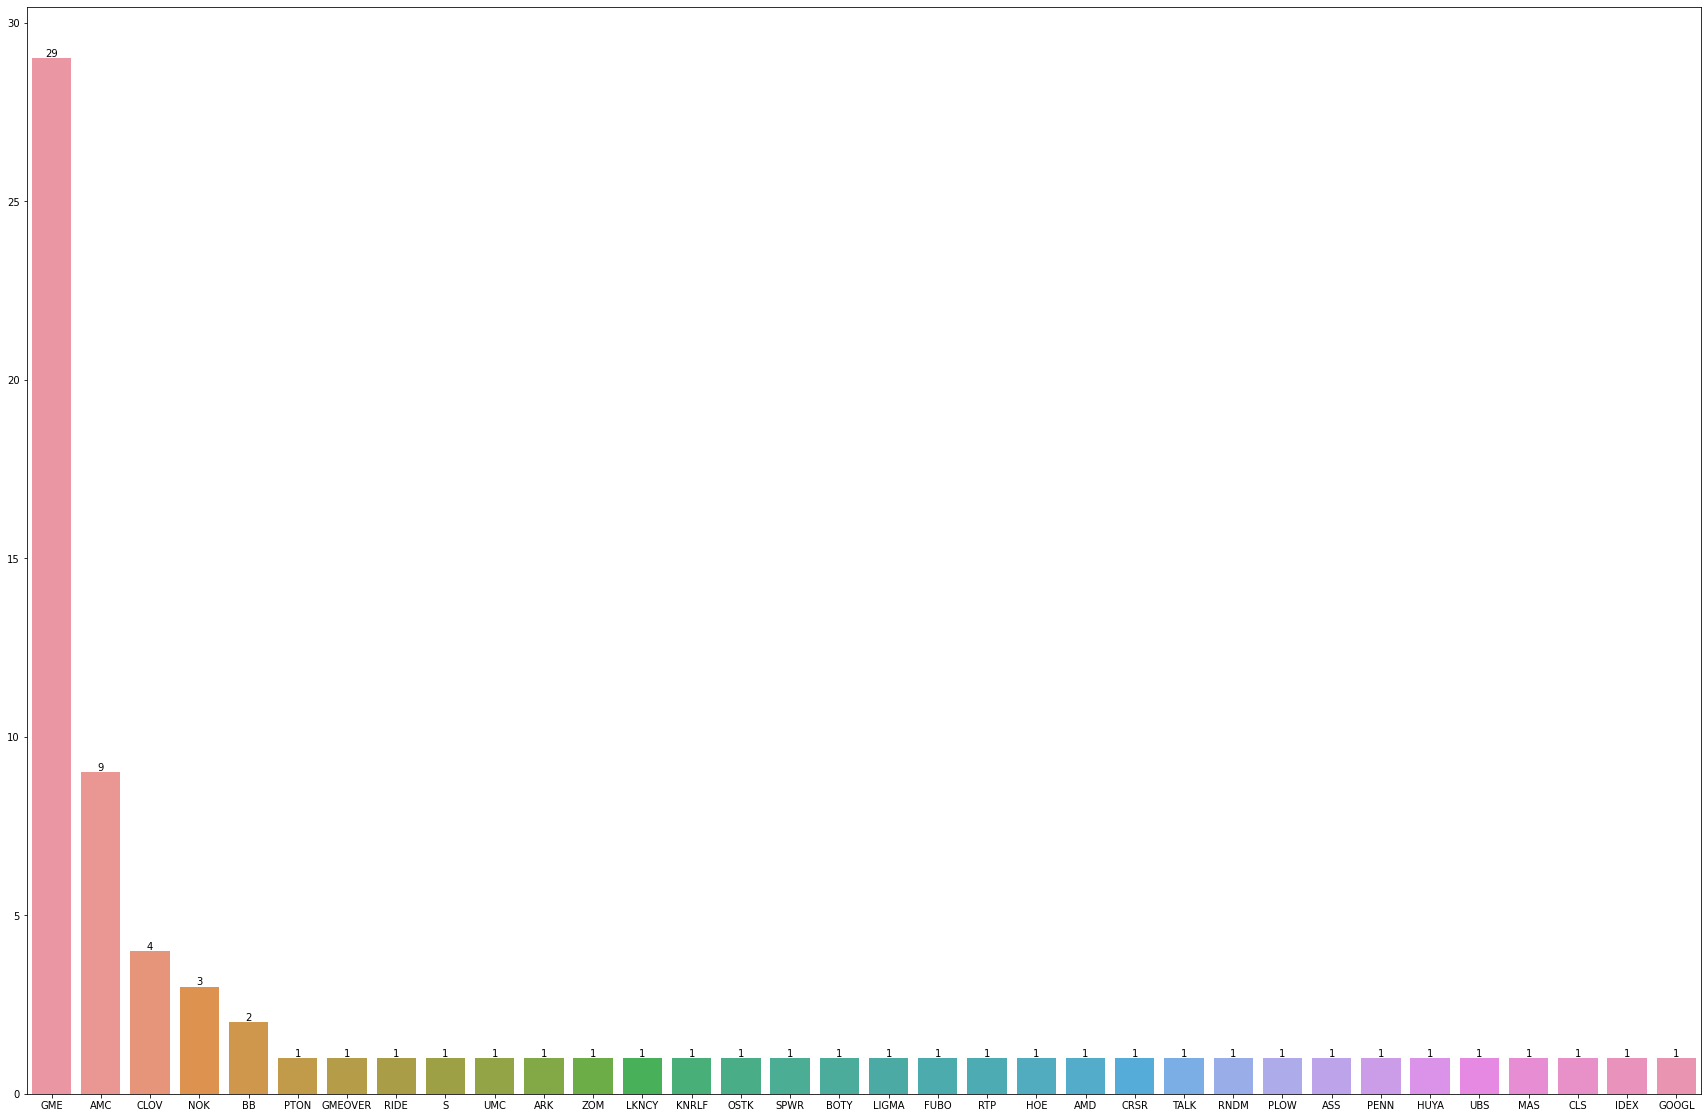

In [100]:
plt.figure(figsize=(30, 20))
chart = sns.barplot(x_values,y_values)
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')